<a href="https://colab.research.google.com/github/Koosj/Final-Team4/blob/main/FINAL_4TEAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/final_project.csv')

In [2]:
#한글 글씨 폰트 설치
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

In [3]:
df = df_1.copy()

In [10]:
df[df['판매자_ID']==0]['리뷰_내용']

,리뷰_내용
306,Anunciam um produto que não tem em estoque e a...
673,NaN
798,Até hoje não recebi meu produto e nem uma resp...
857,Não compre
1304,Comprei dois fones de ouvido com valor de R$ 5...
...,...
113871,"UMA BOSTA NAO ENTREGA, E NAO FAZ ESTORNO DO VA..."
113903,NaN
113991,NaN
113992,Fiz a compra do produto para presentear uma pe...


In [8]:
df[df['판매자_ID']==0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 778 entries, 306 to 114064
Data columns (total 60 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   주문_ID         778 non-null    int64  
 1   고객_ID         778 non-null    int64  
 2   주문상태          778 non-null    object 
 3   주문_구매일시       778 non-null    object 
 4   주문_승인일시       631 non-null    object 
 5   배송사_상품인수일     1 non-null      object 
 6   고객_배송완료일      0 non-null      object 
 7   예상_배송완료일      778 non-null    object 
 8   고객_고유ID       778 non-null    int64  
 9   고객_도시         778 non-null    object 
 10  고객_주          778 non-null    object 
 11  주문상품_ID       0 non-null      float64
 12  상품_ID         778 non-null    int64  
 13  판매자_ID        778 non-null    int64  
 14  판매자_발송기한      0 non-null      object 
 15  상품_가격         0 non-null      float64
 16  배송비           0 non-null      float64
 17  구매개수          0 non-null      float64
 18  상품명_글자수       0 non-null      

In [3]:
df_1.head()

,주문_ID,고객_ID,주문상태,주문_구매일시,주문_승인일시,배송사_상품인수일,고객_배송완료일,예상_배송완료일,고객_고유ID,고객_도시,...,리드행동_프로필,사업자등록_여부,무역_바코드_여부,평균재고,사업유형,등록상품_수,신고월_매출,상품카테고리_대분류,상품카테고리,구매요일
0,1,1,배송완료,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,sao paulo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,생활용품,주방용품,월
1,2,2,배송완료,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2,barreiras,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,헬스/뷰티,향수,화
2,3,3,배송완료,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3,vianopolis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,취미/여가,자동차,수
3,4,4,배송완료,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,4,sao goncalo do amarante,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,생활용품,애완용품,토
4,5,5,배송완료,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,5,santo andre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,생활용품,문구류,화


In [121]:
df[["판매자_도시", "고객_도시"]].value_counts()

판매자_도시           고객_도시         
sao paulo        sao paulo         4814
                 rio de janeiro    1656
ibitinga         sao paulo         1377
sao paulo        belo horizonte     700
ibitinga         rio de janeiro     608
                                   ... 
aguas claras df  tubarao              1
afonso claudio   santa cruz           1
                 niteroi              1
                 macae                1
                 belem                1
Name: count, Length: 36176, dtype: int64

In [117]:
df.groupby(["판매자_도시", "고객_도시"]).sum().reset_index()

,판매자_도시,고객_도시,주문_ID,고객_ID,주문상태,주문_구매일시,주문_승인일시,배송사_상품인수일,고객_배송완료일,예상_배송완료일,고객_고유ID,고객_주,주문상품_ID,상품_ID,판매자_ID,판매자_발송기한,상품_가격,배송비,구매개수,상품명_글자수,상품설명_글자수,상품사진_수량,상품_무게_g,상품_길이_cm,상품_높이_cm,상품_너비_cm,판매자_주,결제금액,결제_유형,리뷰_ID,리뷰_점수,리뷰_제목,리뷰_내용,리뷰_작성일,리뷰답변_처리일시,판매자_우편번호,판매자_위도,판매자_경도,고객우편번호,고객위도,고객_경도,마케팅_리드ID,최초접촉일,랜딩페이지_ID,유입출처,영업_개발_담당자_ID,영업_담당자_ID,계약성사일,사업분야,리드타입,리드행동_프로필,사업자등록_여부,무역_바코드_여부,평균재고,사업유형,등록상품_수,신고월_매출,상품카테고리_대분류,상품카테고리,구매요일
0,04482255,valinhos,12955,12955,처리중,2017-08-25 17:50:50,2017-08-25 18:08:20,0,0,2017-09-26 00:00:00,12894,SP,1.0,5663,1801,2017-09-08 18:08:20,399.90,16.55,1.0,39.0,1949.0,2.0,750.0,22.0,23.0,22.0,RJ,416.45,신용카드,12941,3.0,0,0,2017-09-28 00:00:00,2017-10-02 12:22:33,22790.0,-23.012987,-43.465520,13279.0,-23.009536,-47.018066,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,헬스/뷰티,건강/뷰티,금
1,abadia de goias,sobral,85906,85906,배송완료,2017-07-02 13:10:36,2017-07-02 13:25:09,2017-07-07 17:39:39,2017-07-26 22:53:20,2017-08-02 00:00:00,83378,CE,1.0,30206,3006,2017-07-06 13:25:09,142.47,43.41,1.0,16.0,2709.0,4.0,2700.0,18.0,24.0,16.0,GO,185.88,신용카드,85111,5.0,0,A aminha esposa amou o produto \r\nSuper recom...,2017-07-29 00:00:00,2017-07-29 13:18:15,75345.0,-16.767063,-49.438089,62051.0,-3.697676,-40.340571,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,헬스/뷰티,건강/뷰티,일
2,afonso claudio,belem,12156,12156,배송완료,2017-04-16 20:08:33,2017-04-16 20:21:37,2017-04-18 10:18:27,2017-05-08 09:43:45,2017-05-22 00:00:00,12105,PA,1.0,7846,1763,2017-04-20 20:21:37,99.00,29.62,1.0,54.0,651.0,4.0,1950.0,31.0,23.0,23.0,ES,128.62,신용카드,12143,4.0,0,0,2017-05-09 00:00:00,2017-05-11 05:43:41,29600.0,-20.076822,-41.123711,66812.0,-1.312214,-48.483159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,가전/전자,소형가전,일
3,afonso claudio,franca,70782,70782,배송완료배송완료,2017-01-27 09:29:402017-01-27 09:29:40,2017-01-27 09:41:262017-01-27 09:41:26,2017-01-30 10:14:022017-01-30 10:14:02,2017-02-07 11:33:442017-02-07 11:33:44,2017-03-09 00:00:002017-03-09 00:00:00,69842,SPSP,3.0,33954,3526,2017-01-31 09:29:402017-01-31 09:29:40,37.80,34.38,4.0,86.0,780.0,2.0,2600.0,92.0,14.0,24.0,ESES,144.36,신용카드신용카드,70450,8.0,0,0,2017-02-08 00:00:002017-02-08 00:00:00,2017-02-09 10:56:192017-02-09 10:56:19,59200.0,-40.153643,-82.247423,28804.0,-41.047307,-94.728544,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,가전/전자가전/전자,컴퓨터 액세서리컴퓨터 액세서리,금금
4,afonso claudio,macae,85483,85483,배송완료,2017-03-26 13:31:03,2017-03-27 13:35:18,2017-03-28 11:30:18,2017-04-03 16:13:54,2017-04-18 00:00:00,82980,RJ,1.0,30119,1763,2017-03-31 13:35:18,39.29,15.56,1.0,52.0,251.0,5.0,1098.0,26.0,20.0,20.0,ES,54.85,신용카드,84696,4.0,0,Muito bom o Produto e chegou antes do prazo pr...,2017-04-04 00:00:00,2017-04-06 14:02:21,29600.0,-20.076822,-41.123711,27943.0,-22.378083,-41.785028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,가구/인테리어,가구/인테리어,일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36171,xanxere,santanesia,31497,31497,배송완료,2018-02-25 12:52:37,2018-02-25 13:07:51,2018-02-28 19:32:45,2018-03-18 17:21:22,2018-03-27 00:00:00,31123,RJ,1.0,15711,1752,2018-03-01 13:07:51,215.00,17.95,1.0,59.0,1269.0,6.0,500.0,16.0,4.0,11.0,SC,232.95,신용카드,31370,5.0,0,0,2018-03-19 00:00:00,2018-03-19 22:58:21,89820.0,-26.876415,-52.403995,27195.0,-22.525616,-43.815591,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,취미/여가,자동차,일
36172,xanxere,sao paulo,181192,181192,배송완료배송완료,2018-04-18 08:57:182018-03-17 12:52:37,2018-04-18 09:11:592018-03-17 13:10:35,2018-04-20 22:58:352018-03-20 17:47:33,2018-04-27 22:26:412018-03-27 19:16:57,2018-05-18 00:00:002018-04-12 00:00:00,95968,SPSP,2.0,33848,3504,2018-04-24 09:11:592018-03-22 13:10:35,712.35,50.15,2.0,118.0,2424.0,11.0,2850.0,43.0,16.0,29.0,SCSC,762.50,신용카드신용카드,179439,10.0,0,0,2018-04-28 00:00:002018-03-28 00:00:00,2018-04-29 17:29:012018-03-29 22:27:19,179640.0,-53.752830,-104.807989,7060.0,-47.158592,-93.399106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,취미/여가취미/

In [20]:
df_1.shape

(114092, 60)

In [21]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114092 entries, 0 to 114091
Data columns (total 60 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   주문_ID         114092 non-null  int64  
 1   고객_ID         114092 non-null  int64  
 2   주문상태          114092 non-null  object 
 3   주문_구매일시       114092 non-null  object 
 4   주문_승인일시       113930 non-null  object 
 5   배송사_상품인수일     112112 non-null  object 
 6   고객_배송완료일      110839 non-null  object 
 7   예상_배송완료일      114092 non-null  object 
 8   고객_고유ID       114092 non-null  int64  
 9   고객_도시         114092 non-null  object 
 10  고객_주          114092 non-null  object 
 11  주문상품_ID       113314 non-null  float64
 12  상품_ID         114092 non-null  int64  
 13  판매자_ID        114092 non-null  int64  
 14  판매자_발송기한      113314 non-null  object 
 15  상품_가격         113314 non-null  float64
 16  배송비           113314 non-null  float64
 17  구매개수          113314 non-null  float64
 18  상품명_

In [22]:
df_1.columns

Index(['주문_ID', '고객_ID', '주문상태', '주문_구매일시', '주문_승인일시', '배송사_상품인수일', '고객_배송완료일',
       '예상_배송완료일', '고객_고유ID', '고객_도시', '고객_주', '주문상품_ID', '상품_ID', '판매자_ID',
       '판매자_발송기한', '상품_가격', '배송비', '구매개수', '상품명_글자수', '상품설명_글자수', '상품사진_수량',
       '상품_무게_g', '상품_길이_cm', '상품_높이_cm', '상품_너비_cm', '판매자_도시', '판매자_주',
       '결제금액', '결제_유형', '리뷰_ID', '리뷰_점수', '리뷰_제목', '리뷰_내용', '리뷰_작성일',
       '리뷰답변_처리일시', '판매자_우편번호', '판매자_위도', '판매자_경도', '고객우편번호', '고객위도', '고객_경도',
       '마케팅_리드ID', '최초접촉일', '랜딩페이지_ID', '유입출처', '영업_개발_담당자_ID', '영업_담당자_ID',
       '계약성사일', '사업분야', '리드타입', '리드행동_프로필', '사업자등록_여부', '무역_바코드_여부', '평균재고',
       '사업유형', '등록상품_수', '신고월_매출', '상품카테고리_대분류', '상품카테고리', '구매요일'],
      dtype='object')

In [77]:
# 유입출처는 NaN → "unknown"
df_1["유입출처"] = df_1["유입출처"].fillna("unknown")

# 결제금액는 NaN → 0 (혹은 제거)
df_1["결제금액"] = df_1["결제금액"].fillna(0)

In [23]:
df_1[['상품_가격', '배송비', '구매개수','결제금액']]

,상품_가격,배송비,구매개수,결제금액
0,29.99,8.72,1.0,38.71
1,118.70,22.76,1.0,141.46
2,159.90,19.22,1.0,179.12
3,45.00,27.20,1.0,72.20
4,19.90,8.72,1.0,28.62
...,...,...,...,...
114087,174.90,20.10,1.0,195.00
114088,205.99,65.02,1.0,271.01
114089,179.99,40.59,2.0,441.16
114090,179.99,40.59,2.0,441.16


[해석]
- 결제금액 = (상품가격+배송비) * 구매개수

In [22]:
df_1 = df_1[['주문_ID', '고객_ID', '주문상태','고객_고유ID', '판매자_ID',
      '상품명_글자수', '상품설명_글자수', '상품사진_수량','상품_무게_g', '상품_길이_cm', '상품_높이_cm', '상품_너비_cm',
      '결제금액','마케팅_리드ID', '최초접촉일', '랜딩페이지_ID', '유입출처', '영업_개발_담당자_ID', '영업_담당자_ID',
      '계약성사일', '사업분야', '리드타입', '리드행동_프로필', '사업자등록_여부', '무역_바코드_여부', '평균재고',
      '사업유형', '등록상품_수', '신고월_매출', '상품카테고리_대분류', '상품카테고리',]]

In [27]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114092 entries, 0 to 114091
Data columns (total 31 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   주문_ID         114092 non-null  int64  
 1   고객_ID         114092 non-null  int64  
 2   주문상태          114092 non-null  object 
 3   고객_고유ID       114092 non-null  int64  
 4   판매자_ID        114092 non-null  int64  
 5   상품명_글자수       111702 non-null  float64
 6   상품설명_글자수      111702 non-null  float64
 7   상품사진_수량       111702 non-null  float64
 8   상품_무게_g       113296 non-null  float64
 9   상품_길이_cm      113296 non-null  float64
 10  상품_높이_cm      113296 non-null  float64
 11  상품_너비_cm      113296 non-null  float64
 12  결제금액          114089 non-null  float64
 13  마케팅_리드ID      5050 non-null    object 
 14  최초접촉일         5050 non-null    object 
 15  랜딩페이지_ID      5050 non-null    object 
 16  유입출처          5039 non-null    object 
 17  영업_개발_담당자_ID  5050 non-null    object 
 18  영업_담

In [29]:
df_1.columns

Index(['주문_ID', '고객_ID', '주문상태', '고객_고유ID', '판매자_ID', '상품명_글자수', '상품설명_글자수',
       '상품사진_수량', '상품_무게_g', '상품_길이_cm', '상품_높이_cm', '상품_너비_cm', '결제금액',
       '마케팅_리드ID', '최초접촉일', '랜딩페이지_ID', '유입출처', '영업_개발_담당자_ID', '영업_담당자_ID',
       '계약성사일', '사업분야', '리드타입', '리드행동_프로필', '사업자등록_여부', '무역_바코드_여부', '평균재고',
       '사업유형', '등록상품_수', '신고월_매출', '상품카테고리_대분류', '상품카테고리'],
      dtype='object')

## 가설1 유입출처에 따른 결제금액 평균이 동일할것이다

### 목표 :  결제금액과 유입출처의 상관관계 파악하기

  1. 유입출처 분석  
    - 각 유입출처 비율 보기
    - unique한 셀러 기준 유입출처 비율 보기
  2. 결제금액  
    - 결제금액 = (상품가격+배송비) * 구매개수
    - 결제금액의 평균, 합, 중앙값 보기  

       
    
- 어느 유입출처가 가장 평균액이 높은지 보기


In [30]:
df_1['유입출처'].value_counts()

,count
유입출처,
paid_search,1449
unknown,1372
organic_search,1351
social,444
direct_traffic,218
other,97
referral,77
email,24
display,7


In [17]:
df_1['판매자_ID'].nunique()

3096

In [92]:
seller_sum = (
    df_1.groupby("유입출처")["결제금액"]
      .sum()).reset_index()
seller_sum

,유입출처,결제금액
0,direct_traffic,33242.73
1,display,1207.95
2,email,9229.57
3,organic_search,294356.38
4,other,10405.39
5,paid_search,251308.20
6,referral,22026.48
7,social,67671.60
8,unknown,19890215.71


             유입출처   count        mean   median          sum
0  direct_traffic     218  152.489587   94.125     33242.73
1         display       7  172.564286  178.220      1207.95
2           email      24  384.565417   68.035      9229.57
3  organic_search    1351  217.880370  120.650    294356.38
4           other      97  107.272062   73.010     10405.39
5     paid_search    1449  173.435611  118.350    251308.20
6        referral      77  286.058182  174.320     22026.48
7          social     444  152.413514  108.200     67671.60
8         unknown  110425  180.124208  114.180  19890215.71


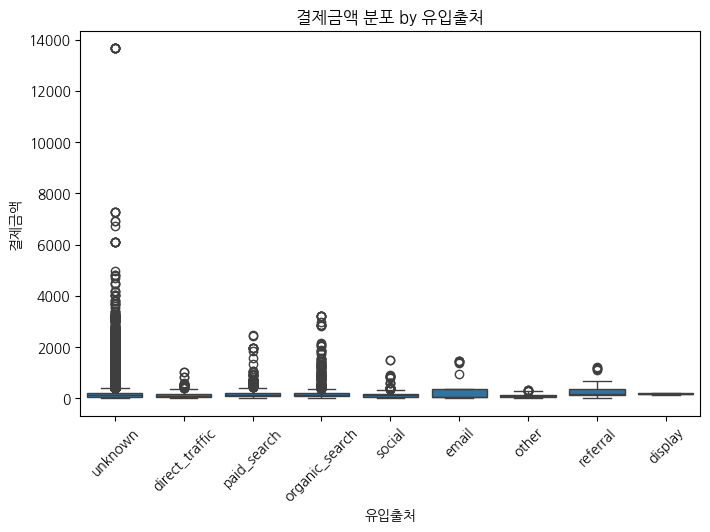

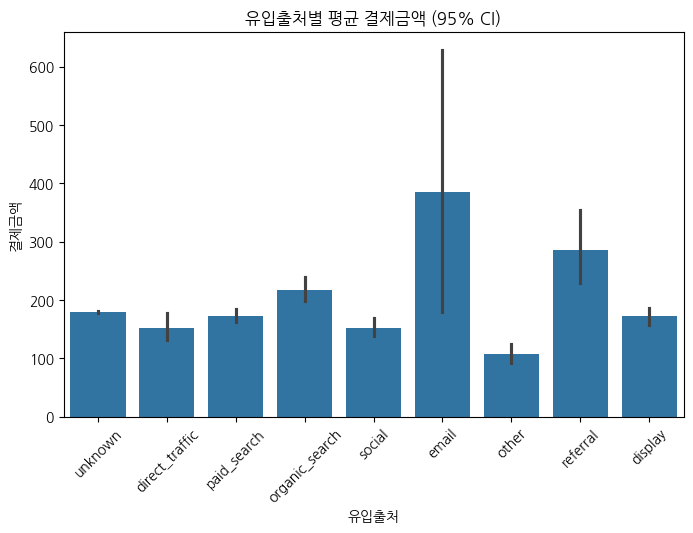

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 예시 데이터프레임: df_1
# df_1.columns = ["user_id", "source", "결제금액"]

# 유입출처별 결제금액 평균/중앙값/합계
summary = df_1.groupby("유입출처")["결제금액"].agg(["count", "mean", "median", "sum"]).reset_index()
print(summary)

# 박스플롯 (분포 비교)
plt.figure(figsize=(8,5))
sns.boxplot(data=df_1, x="유입출처", y="결제금액")
plt.xticks(rotation=45)
plt.title("결제금액 분포 by 유입출처")
plt.show()

# 바플롯 (평균 결제금액)
plt.figure(figsize=(8,5))
sns.barplot(data=df_1, x="유입출처", y="결제금액", estimator="mean", errorbar="ci")
plt.xticks(rotation=45)
plt.title("유입출처별 평균 결제금액 (95% CI)")
plt.show()

In [96]:
seller_sum_drop = seller_sum.loc[seller_sum["유입출처"] != "unknown"]
seller_sum_drop

,유입출처,결제금액
0,direct_traffic,33242.73
1,display,1207.95
2,email,9229.57
3,organic_search,294356.38
4,other,10405.39
5,paid_search,251308.20
6,referral,22026.48
7,social,67671.60


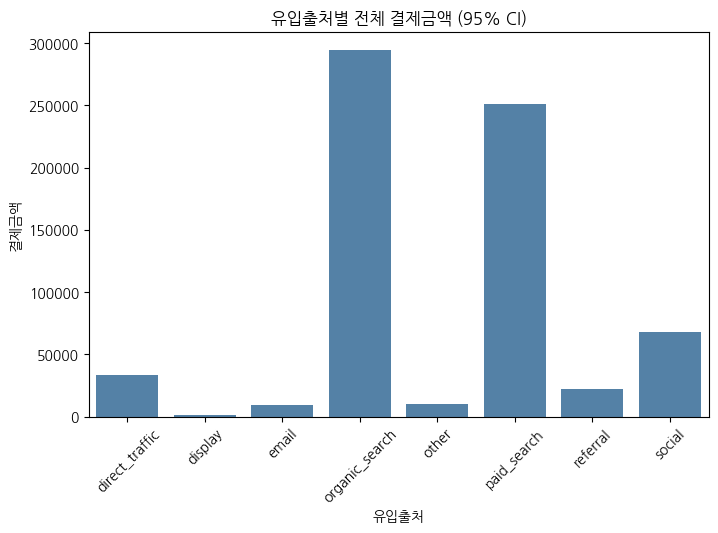

In [97]:

# 바플롯 (평균 결제금액)
plt.figure(figsize=(8,5))
sns.barplot(data=seller_sum_drop, x="유입출처", y="결제금액", estimator="sum", color="steelblue")
plt.xticks(rotation=45)
plt.title("유입출처별 전체 결제금액 (95% CI)")
plt.show()

[해석]  
- 평균적으로 이메일과 제휴(referral) 유입 고객의 결제금액이 가장 높음.  

- 다만 email은 신뢰구간이 크기 때문에 해석에 주의 필요 (데이터가 적거나 편차가 큰 경우).

- organic_search, display, paid_search는 중간 그룹.

- other, social, direct_traffic은 낮은 결제금액 경향.

In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 1. ANOVA (일원분산분석)
model = ols("결제금액 ~ C(유입출처)", data=df_1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA 결과:\n", anova_table)

# 2. 사후검정 (Tukey HSD)
tukey = pairwise_tukeyhsd(endog=df_1["결제금액"], groups=df_1["유입출처"], alpha=0.05)
print("\nTukey HSD 결과:\n", tukey.summary())

ANOVA 결과:
                 sum_sq        df         F        PR(>F)
C(유입출처)   4.873220e+06       8.0  8.173626  4.073967e-11
Residual  8.502218e+09  114083.0       NaN           NaN

Tukey HSD 결과:
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
    group1         group2      meandiff p-adj    lower    upper   reject
------------------------------------------------------------------------
direct_traffic        display   20.0747    1.0 -305.0678 345.2172  False
direct_traffic          email  232.0758 0.0025    49.966 414.1857   True
direct_traffic organic_search   65.3908 0.0286     3.587 127.1946   True
direct_traffic          other  -45.2175 0.9137 -148.5652  58.1302  False
direct_traffic    paid_search    20.946 0.9801  -40.5667  82.4588  False
direct_traffic       referral  133.5686 0.0069   21.3158 245.8214   True
direct_traffic         social   -0.0761    1.0  -70.1036  69.9515  False
direct_traffic        unknown   27.6346 0.8592  -29.7717  85.0409  False

[해석]
1. 시각화 결과
- unknown, organic_search, paid_search에 이상치 존재함
- 신뢰구간의 경우 평균 자체는 email이 높지만 분산이 너무 높음
- direcct_traffic, other, social 평균 및 신뢰구간 하위그룹
- display, organic_search, paid_search는 중간그룹
- referral, email이 상위그룹이나 email은 신뢰구간이 너무 커 제외
### 결론1 referral 채널이 상대적으로 유용함

2. ANOVA + Tukey HSD 결과
- F=8.173626  
- PR(>F) < 0.05
### 결론2. 유입경로별 평균 매출액의 경우 유의미하다

### 최종결론 경영자/마케터입장으로 유입경로와 총 매출이 유의미하다

### 마케팅 데이터

In [23]:
df_1_maketing = df_1[['주문_ID', '고객_ID', '주문상태','고객_고유ID', '판매자_ID',
      '결제금액','마케팅_리드ID', '최초접촉일', '랜딩페이지_ID', '유입출처', '영업_개발_담당자_ID', '영업_담당자_ID',
      '계약성사일', '사업분야', '리드타입', '리드행동_프로필', '사업자등록_여부', '무역_바코드_여부', '평균재고',
      '사업유형', '등록상품_수', '신고월_매출', '상품카테고리_대분류', '상품카테고리',]]

In [24]:
df_1_maketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114092 entries, 0 to 114091
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   주문_ID         114092 non-null  int64  
 1   고객_ID         114092 non-null  int64  
 2   주문상태          114092 non-null  object 
 3   고객_고유ID       114092 non-null  int64  
 4   판매자_ID        114092 non-null  int64  
 5   결제금액          114089 non-null  float64
 6   마케팅_리드ID      5050 non-null    object 
 7   최초접촉일         5050 non-null    object 
 8   랜딩페이지_ID      5050 non-null    object 
 9   유입출처          5039 non-null    object 
 10  영업_개발_담당자_ID  5050 non-null    object 
 11  영업_담당자_ID     5050 non-null    object 
 12  계약성사일         5050 non-null    object 
 13  사업분야          5050 non-null    object 
 14  리드타입          5002 non-null    object 
 15  리드행동_프로필      3308 non-null    object 
 16  사업자등록_여부      30 non-null      object 
 17  무역_바코드_여부     30 non-null      object 
 18  평균재고

In [36]:
pd.set_option("display.max_columns", None)

In [37]:
df_1_maketingYes = df_1_maketing.iloc[df_1_maketing["마케팅_리드ID"].notna().values]

In [57]:
df_1_maketingYes

,주문_ID,고객_ID,주문상태,고객_고유ID,판매자_ID,결제금액,마케팅_리드ID,최초접촉일,랜딩페이지_ID,유입출처,영업_개발_담당자_ID,영업_담당자_ID,계약성사일,사업분야,리드타입,리드행동_프로필,사업자등록_여부,무역_바코드_여부,평균재고,사업유형,등록상품_수,신고월_매출,상품카테고리_대분류,상품카테고리
13,13,13,배송완료,13,13,50.13,62a081b993506561f522af260073cb18,2018-03-02,4e24f6443807ad2eba56754b0dc91140,direct_traffic,9e4d1098a3b0f5da39b0bc48f9876645,4ef15afb4b2723d8f3d81e51ec7afefe,2018-03-13 12:33:10,health_beauty,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,헬스/뷰티,향수
16,16,16,배송완료,16,16,146.45,7c3e1a45e4127c0eb25d7a8b7250da5b,2017-08-30,fbc24da54d531c6204ae2d17b1090bb1,paid_search,068066e24f0c643eb1d089c7dd20cd73,060c0a26f19f4d66b42e0d8796688490,2018-04-10 19:17:03,health_beauty,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0,헬스/뷰티,향수
25,25,25,배송완료,25,25,104.11,f74b25a7dc1504cf5a3b964a990266ff,2018-01-19,b76ef37428e6799c421989521c0e5077,organic_search,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-03-01 14:58:45,baby,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,생활용품,문구류
30,29,29,배송완료,29,30,192.68,0b97be8b4b408a3a0780a32e0a143a7f,2018-01-22,b76ef37428e6799c421989521c0e5077,unknown,56bf83c4bb35763a51c2baab501b4c67,9ae085775a198122c5586fa830ff7f2b,2018-02-08 17:20:14,watches,online_big,NaN,NaN,NaN,NaN,reseller,NaN,0.0,패션,시계/선물
45,44,44,배송완료,44,44,121.62,68482ad368c7b9779cf50a7164815379,2018-05-22,b76ef37428e6799c421989521c0e5077,unknown,4b339f9567d060bcea4f5136b9f5949e,de63de0d10a6012430098db33c679b0b,2018-05-24 20:25:11,bags_backpacks,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,생활용품,문구류
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114022,99377,99377,배송완료,96034,2413,78.78,145bce9926e5e1adbddd13d9ee519c3e,2018-02-06,7fa6214d82e911d070f51ef79381b956,organic_search,068066e24f0c643eb1d089c7dd20cd73,2695de1affa7750089c0455f8ce27021,2018-02-06 02:00:00,car_accessories,online_medium,NaN,NaN,NaN,NaN,reseller,NaN,0.0,생활용품,주방용품
114024,99379,99379,배송완료,96036,1256,37.82,115f08592f4c2bb29013efbbc46608fc,2018-01-15,b76ef37428e6799c421989521c0e5077,unknown,4b339f9567d060bcea4f5136b9f5949e,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-14 11:48:29,construction_tools_house_garden,online_big,NaN,NaN,NaN,NaN,reseller,NaN,0.0,생활용품,주방용품
114041,99395,99395,배송완료,96052,1099,98.23,e758533feded97683d573154714a195b,2018-04-18,22c29808c4f815213303f8933030604c,referral,a8387c01a09e99ce014107505b92388c,d3d1e91a157ea7f90548eef82f1955e3,2018-04-18 16:43:53,health_beauty,offline,eagle,NaN,NaN,NaN,reseller,NaN,0.0,헬스/뷰티,건강/뷰티
114043,99397,99397,배송완료,96054,868,239.50,e9631bea70bc3ae4018bff0eac2c0986,2018-05-03,ca2cd580bff13775c778f128c7db2b41,social,370c9f455f93a9a96cbe9bea48e70033,a8387c01a09e99ce014107505b92388c,2018-05-17 12:42:15,home_decor,online_medium,eagle,NaN,NaN,NaN,manufacturer,NaN,0.0,가구/인테리어,침실 가구


In [45]:
df_1_maketingYes['마케팅_리드ID'].value_counts()

,count
마케팅_리드ID,
0b97be8b4b408a3a0780a32e0a143a7f,578
7b6ad2297d3beb569ddf3ee1ce22ffa8,338
327174d3648a2d047e8940d7d15204ca,110
384008daaa0f14b58912d8648101fdd0,106
fc4166d1b1e192f650ee2d807b54c943,98
...,...
099c0eddd44f937ac2facf3a72263b7f,1
e29db7c8b090e8df0246f5a54cd72799,1
75743dbfcf177f2885a59b460017feee,1


In [48]:
df_1_maketingYes.loc[df_1_maketingYes["마케팅_리드ID"]=="0b97be8b4b408a3a0780a32e0a143a7f"]

,주문_ID,고객_ID,주문상태,고객_고유ID,판매자_ID,결제금액,마케팅_리드ID,최초접촉일,랜딩페이지_ID,유입출처,영업_개발_담당자_ID,영업_담당자_ID,계약성사일,사업분야,리드타입,리드행동_프로필,사업자등록_여부,무역_바코드_여부,평균재고,사업유형,등록상품_수,신고월_매출,상품카테고리_대분류,상품카테고리
30,29,29,배송완료,29,30,192.68,0b97be8b4b408a3a0780a32e0a143a7f,2018-01-22,b76ef37428e6799c421989521c0e5077,unknown,56bf83c4bb35763a51c2baab501b4c67,9ae085775a198122c5586fa830ff7f2b,2018-02-08 17:20:14,watches,online_big,NaN,NaN,NaN,NaN,reseller,NaN,0.0,패션,시계/선물
302,263,263,배송완료,263,30,198.12,0b97be8b4b408a3a0780a32e0a143a7f,2018-01-22,b76ef37428e6799c421989521c0e5077,unknown,56bf83c4bb35763a51c2baab501b4c67,9ae085775a198122c5586fa830ff7f2b,2018-02-08 17:20:14,watches,online_big,NaN,NaN,NaN,NaN,reseller,NaN,0.0,패션,시계/선물
473,417,417,배송완료,417,30,99.90,0b97be8b4b408a3a0780a32e0a143a7f,2018-01-22,b76ef37428e6799c421989521c0e5077,unknown,56bf83c4bb35763a51c2baab501b4c67,9ae085775a198122c5586fa830ff7f2b,2018-02-08 17:20:14,watches,online_big,NaN,NaN,NaN,NaN,reseller,NaN,0.0,패션,시계/선물
491,434,434,배송완료,434,30,200.23,0b97be8b4b408a3a0780a32e0a143a7f,2018-01-22,b76ef37428e6799c421989521c0e5077,unknown,56bf83c4bb35763a51c2baab501b4c67,9ae085775a198122c5586fa830ff7f2b,2018-02-08 17:20:14,watches,online_big,NaN,NaN,NaN,NaN,reseller,NaN,0.0,패션,시계/선물
762,662,662,배송완료,662,30,110.00,0b97be8b4b408a3a0780a32e0a143a7f,2018-01-22,b76ef37428e6799c421989521c0e5077,unknown,56bf83c4bb35763a51c2baab501b4c67,9ae085775a198122c5586fa830ff7f2b,2018-02-08 17:20:14,watches,online_big,NaN,NaN,NaN,NaN,reseller,NaN,0.0,패션,시계/선물
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112979,98496,98496,배송완료,95213,30,249.95,0b97be8b4b408a3a0780a32e0a143a7f,2018-01-22,b76ef37428e6799c421989521c0e5077,unknown,56bf83c4bb35763a51c2baab501b4c67,9ae085775a198122c5586fa830ff7f2b,2018-02-08 17:20:14,watches,online_big,NaN,NaN,NaN,NaN,reseller,NaN,0.0,패션,시계/선물
113168,98655,98655,배송완료,95368,30,222.93,0b97be8b4b408a3a0780a32e0a143a7f,2018-01-22,b76ef37428e6799c421989521c0e5077,unknown,56bf83c4bb35763a51c2baab501b4c67,9ae085775a198122c5586fa830ff7f2b,2018-02-08 17:20:14,watches,online_big,NaN,NaN,NaN,NaN,reseller,NaN,0.0,가전/전자,전자제품
113322,98790,98790,배송완료,95494,30,99.90,0b97be8b4b408a3a0780a32e0a143a7f,2018-01-22,b76ef37428e6799c421989521c0e5077,unknown,56bf83c4bb35763a51c2baab501b4c67,9ae085775a198122c5586fa830ff7f2b,2018-02-08 17:20:14,watches,online_big,NaN,NaN,NaN,NaN,reseller,NaN,0.0,패션,시계/선물
113326,98794,98794,배송완료,95498,30,571.73,0b97be8b4b408a3a0780a32e0a143a7f,2018-01-22,b76ef37428e6799c421989521c0e5077,unknown,56bf83c4bb35763a51c2baab501b4c67,9ae085775a198122c5586fa830ff7f2b,2018-02-08 17:20:14,watches,online_big,NaN,NaN,NaN,NaN,reseller,NaN,0.0,패션,시계/선물


In [47]:
df_1_maketingYes.loc[df_1_maketingYes["마케팅_리드ID"]=="0b97be8b4b408a3a0780a32e0a143a7f"]['사업분야'].value_counts()

,count
사업분야,
watches,578


[해석] 마케팅한 셀러중 가장 많은 판매를 한 셀러만 보았을때 거래내역의 578건 전부 watches였다.
- 마케팅_리드ID : 0b97be8b4b408a3a0780a32e0a143a7f

In [78]:
# 유입출처는 NaN → "unknown"
df_1_maketingYes["유입출처"] = df_1_maketingYes["유입출처"].fillna("unknown")

# 결제금액는 NaN → 0 (혹은 제거)
df_1_maketingYes["결제금액"] = df_1_maketingYes["결제금액"].fillna(0)

/tmp/ipython-input-1567272190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_maketingYes["유입출처"] = df_1_maketingYes["유입출처"].fillna("unknown")
/tmp/ipython-input-1567272190.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_maketingYes["결제금액"] = df_1_maketingYes["결제금액"].fillna(0)


In [76]:
df_1_maketingYes["유입출처"].isna().sum()

np.int64(11)

In [82]:
maketing_seller_sum = (
    df_1_maketingYes.groupby(["마케팅_리드ID", "유입출처"], as_index=False)["결제금액"]
      .sum())
maketing_seller_sum

,마케팅_리드ID,유입출처,결제금액
0,009ff90f082aaa9fcd6e14caf65c7cc6,paid_search,2694.27
1,014c073ef65e4a7ef73acd61cf606164,unknown,2512.25
2,0173e8d8b1d94a355b440fb67388f532,paid_search,313.61
3,01c629f6b8f2460aa362f29caaaa0a8e,social,181.32
4,02c1f06978b821b2996ec257932f2947,organic_search,4349.04
...,...,...,...
375,fe75268bb28b40ef89979d0ec2c54497,direct_traffic,8174.80
376,ff89e8ee1db049c810a2da86c84c6bd5,unknown,937.75
377,ffdd99e05df27c02a2fb1669d49e0c76,organic_search,7207.63
378,ffe640179b554e295c167a2f6be528e0,unknown,1060.66


             유입출처  count         mean    median        sum
0  direct_traffic     31  1072.346129   752.510   33242.73
1         display      2   603.975000   603.975    1207.95
2           email      6  1538.261667   486.300    9229.57
3  organic_search    113  2604.923717   905.550  294356.38
4           other      2  5202.695000  5202.695   10405.39
5     paid_search    101  2488.200000   712.440  251308.20
6        referral      9  2447.386667  1606.630   22026.48
7          social     31  2182.954839  1061.300   67671.60
8         unknown     85  3345.612353   819.530  284377.05


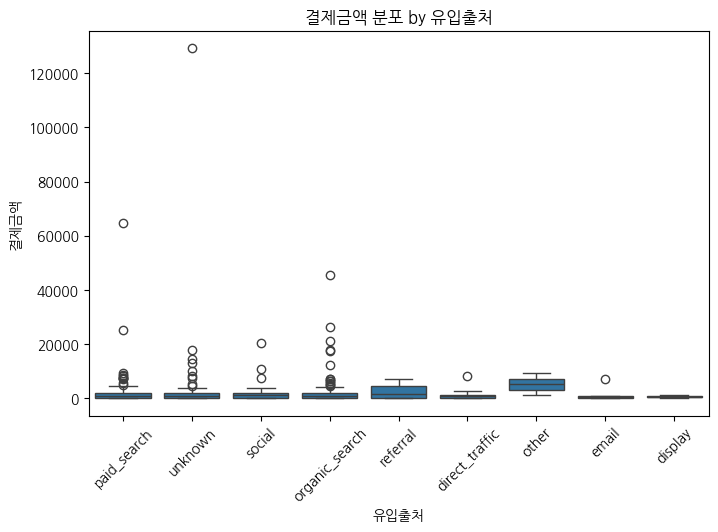

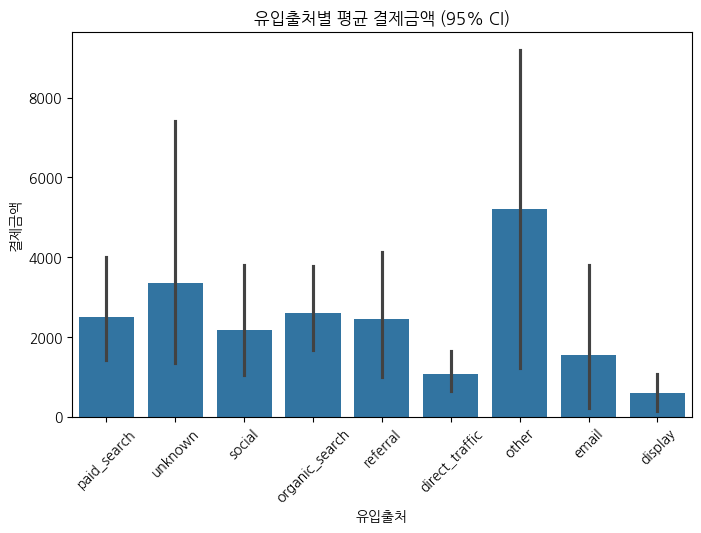

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 예시 데이터프레임: maketing_seller_sum
# maketing_seller_sum.columns = ["user_id", "source", "결제금액"]

# 유입출처별 결제금액 평균/중앙값/합계
summary = maketing_seller_sum.groupby("유입출처")["결제금액"].agg(["count", "mean", "median", "sum"]).reset_index()
print(summary)

# 박스플롯 (분포 비교)
plt.figure(figsize=(8,5))
sns.boxplot(data=maketing_seller_sum, x="유입출처", y="결제금액")
plt.xticks(rotation=45)
plt.title("결제금액 분포 by 유입출처")
plt.show()

# 바플롯 (평균 결제금액)
plt.figure(figsize=(8,5))
sns.barplot(data=maketing_seller_sum, x="유입출처", y="결제금액", estimator="mean", errorbar="ci")
plt.xticks(rotation=45)
plt.title("유입출처별 평균 결제금액 (95% CI)")
plt.show()

In [98]:
maketing_seller_sum_drop = maketing_seller_sum.loc[maketing_seller_sum["유입출처"] != "unknown"]
maketing_seller_sum_drop

,마케팅_리드ID,유입출처,결제금액
0,009ff90f082aaa9fcd6e14caf65c7cc6,paid_search,2694.27
2,0173e8d8b1d94a355b440fb67388f532,paid_search,313.61
3,01c629f6b8f2460aa362f29caaaa0a8e,social,181.32
4,02c1f06978b821b2996ec257932f2947,organic_search,4349.04
5,04921466d09d50f6541fdd33b322c876,organic_search,2155.35
...,...,...,...
373,fc723a87e241c9b3c2e5fd4df4ff8e9d,organic_search,21265.20
374,fd582eb497bfc1fdf07f3e7d0e259b70,organic_search,389.56
375,fe75268bb28b40ef89979d0ec2c54497,direct_traffic,8174.80
377,ffdd99e05df27c02a2fb1669d49e0c76,organic_search,7207.63


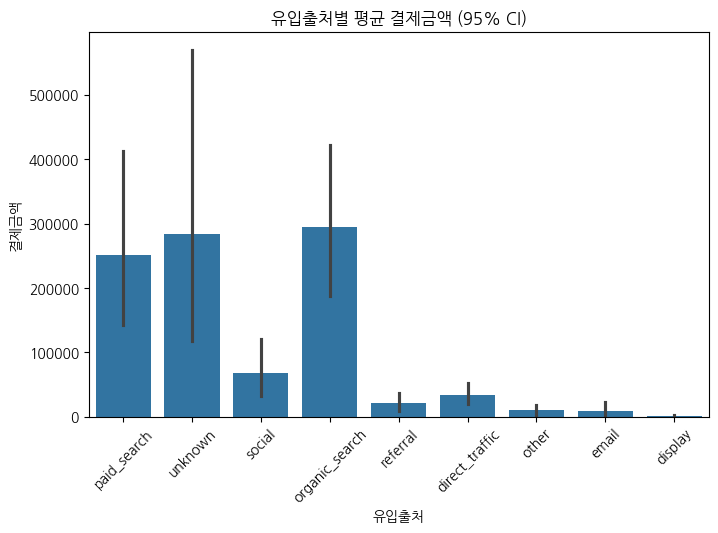

In [102]:
# 바플롯 (평균 결제금액)
plt.figure(figsize=(8,5))
sns.barplot(data=maketing_seller_sum, x="유입출처", y="결제금액", estimator="sum", errorbar="ci")
plt.xticks(rotation=45)
plt.title("유입출처별 평균 결제금액 (95% CI)")
plt.show()

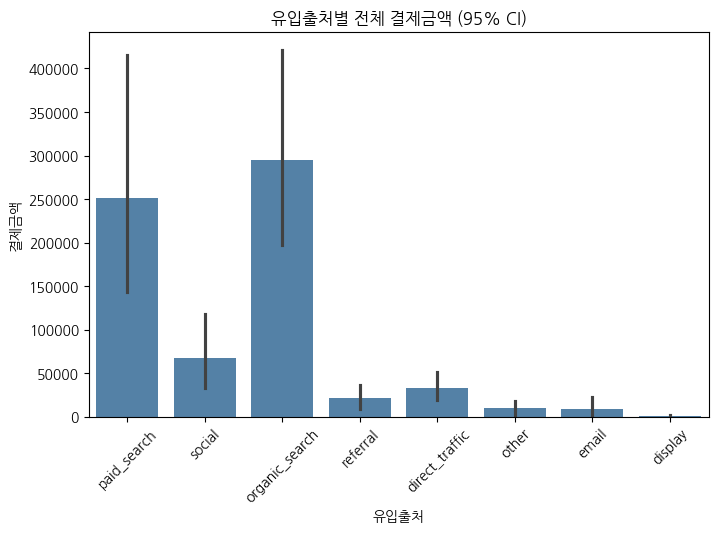

In [99]:
# 바플롯 (평균 결제금액)
plt.figure(figsize=(8,5))
sns.barplot(data=maketing_seller_sum_drop, x="유입출처", y="결제금액", estimator="sum", color="steelblue")
plt.xticks(rotation=45)
plt.title("유입출처별 전체 결제금액 (95% CI)")
plt.show()

In [84]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 1. ANOVA (일원분산분석)
model = ols("결제금액 ~ C(유입출처)", data=maketing_seller_sum).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA 결과:\n", anova_table)

# 2. 사후검정 (Tukey HSD)
tukey = pairwise_tukeyhsd(endog=maketing_seller_sum["결제금액"], groups=maketing_seller_sum["유입출처"], alpha=0.05)
print("\nTukey HSD 결과:\n", tukey.summary())

ANOVA 결과:
                 sum_sq     df         F    PR(>F)
C(유입출처)   1.542180e+08    8.0  0.272912  0.974463
Residual  2.620578e+10  371.0       NaN       NaN

Tukey HSD 결과:
              Multiple Comparison of Means - Tukey HSD, FWER=0.05             
    group1         group2      meandiff  p-adj     lower      upper    reject
-----------------------------------------------------------------------------
direct_traffic        display  -468.3711    1.0 -19600.2138 18663.4715  False
direct_traffic          email   465.9155    1.0 -11230.1573 12161.9884  False
direct_traffic organic_search  1532.5776 0.9929  -3784.3023  6849.4575  False
direct_traffic          other  4130.3489 0.9991 -15001.4938 23262.1915  False
direct_traffic    paid_search  1415.8539 0.9962  -3968.5931  6800.3009  False
direct_traffic       referral  1375.0405    1.0  -8554.3723 11304.4534  False
direct_traffic         social  1110.6087 0.9999  -5550.2439  7771.4613  False
direct_traffic        unknown  2273.2662 0.

##[해석]
1. 시각화 결과
- unknown, paid_search에 이상치 존재함
- 신뢰구간의 경우 평균 자체는 other이 높지만 분산이 너무 높음
- direcct_traffic, display는 평균 및 신뢰구간 모두 낮음
- social, organic_search, referral은 평균이 중간 이상이고, 에러바 폭도 상대적으로 높음  
### 결론1 social, organic_search, referral 채널이 상대적으로 유용함

2. ANOVA + Tukey HSD 결과
- F=0.27912  
- PR(>F)=0.974463  
### 결론2. 셀러당 유입경로별 평균 매출액의 경우 유의미하지 않다

### 최종결론 개별 셀러의 유입경로별 평균 매출액의 경우 유의미하지 않다